In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as sts
from datetime import date

In [2]:
power_plants_csv = pd.read_csv('Global Power Plant.csv')
#Thanks to dbouquin for compuling the data for this https://github.com/dbouquin/IS_608
world_countries_source_A = pd.read_csv('Countries-Continents.csv')
power_plants_source = power_plants_csv.rename(columns = {'Capacity (MW)': 'Capacity'})
world_countries_source = world_countries_source_A
power_plants_source.head(20)

,Country,Powerplant Name,gppd_idnr,Capacity,Latitude,Longitude,Primary Fuel,Owner,Source
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,GEODB
1,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,GEODB
2,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,GEODB
3,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,GEODB
4,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,GEODB
5,Afghanistan,Pul-e-Khumri Hydroelectric Power Plant Afghani...,GEODB0040537,6.00,35.9416,68.7100,Hydro,NaN,GEODB
6,Afghanistan,Sarobi Dam Hydroelectric Power Plant Afghanistan,GEODB0040535,22.00,34.5865,69.7757,Hydro,NaN,GEODB
7,Albania,Bistrica 1,WRI1002169,27.00,39.9116,20.1047,Hydro,NaN,Energy Charter Secretariat
8,Albania,Fierza,WRI1002170,500.00,42.2514,20.0431,Hydro,NaN,Energy Charter Secretariat
9,Albania,Koman,WRI1002171,600.00,42.1033,19.8224,Hydro,NaN,Energy Charter Secretariat


In [3]:
counting_of_pp = power_plants_source['Country'].count()
print(counting_of_pp)

29910


In [4]:
USA = power_plants_source.loc[(power_plants_source["Country"] == 'United States of America')]
#print(USA['Primary Fuel'].value_counts())Solar')]
USA_gas = power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Gas')]
USA_solar= power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Solar')]
#USA['Country'].count()
print(USA['Capacity'].sum())

1193616.45


In [5]:
solar_output_total = USA_solar['Capacity'].sum()
gas_output_total = USA_gas['Capacity'].sum()
Comparison_of_power = gas_output_total / solar_output_total
txt1 = " Solar power is produced at a total of  {Solar} and gas produces on total  {Gas}. All of which is measured in MW. Gas produces {multiple} times more energy than solar in the US.".format(Solar = solar_output_total, Gas = gas_output_total, multiple = Comparison_of_power)
print(txt1)

 Solar power is produced at a total of  27369.85 and gas produces on total  525687.8999999999. All of which is measured in MW. Gas produces 19.20682429753908 times more energy than solar in the US.


In [6]:
#Clean Energy tables
USA_hydro= power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Hydro')]
USA_wind = power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Wind')]
USA_nuclear = power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Nuclear')]
USA_geothermal = power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Geothermal')]
USA_biomass = power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Biomass')]
USA_waste = power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Waste')]
#USA['Country'].count()

In [7]:
hydro_sum = USA_hydro['Capacity'].sum()
wind_sum = USA_wind['Capacity'].sum()
nuclear_sum = USA_nuclear['Capacity'].sum()
geothermal_sum = USA_geothermal['Capacity'].sum()
biomass_sum = USA_biomass['Capacity'].sum()
waste_sum = USA_waste['Capacity'].sum()
clean_total = hydro_sum + wind_sum + nuclear_sum + geothermal_sum + biomass_sum + waste_sum + solar_output_total
print(clean_total) 

342888.75


In [8]:
USA_coal= power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Coal')]
USA_oil= power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Oil')]
#-------------------------------------------------
coal_sum = USA_coal['Capacity'].sum()
oil_sum =USA_oil['Capacity'].sum()
dirty_power = coal_sum + oil_sum + gas_output_total
power_output_comparison = dirty_power / clean_total
print('The power difference between dirty and clean power out put is roughly {total_energies} times. In favor of dirty power.'. format(total_energies = power_output_comparison))

The power difference between dirty and clean power out put is roughly 2.467640889355512 times. In favor of dirty power.


In [9]:
all_power_sum = power_plants_source['Capacity'].sum()
US_total= USA['Capacity'].sum()
print(US_total / all_power_sum)
#print(US_total)

0.21421388949111136


In [10]:
test_number = power_plants_source['Country'].nunique()
print(test_number)

164


In [11]:
coordinate_tes_min = USA['Longitude'].min()
coordinate_test_max = USA['Longitude'].max()
print(coordinate_tes_min)
print(coordinate_test_max)

-171.7124
144.8999


In [12]:
africa = world_countries_source.loc[(world_countries_source["Continent"] == 'Africa')]
african_countries = list(africa['Country'])
#thing = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Congo, Democratic Republic of', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']
#capacity_values = []
#for row in power_plants_source.iterrows():
 #   if power_plants_source['Country']  thing:
  #      capacity_values.append(row['Capacity (MW)'])
#prit(capacity_values)
#print(african_countries)


In [13]:
country_name = []
capacity_amount= []
#print(power_plants_source.keys())

for country in african_countries:
    country_test = power_plants_source.loc[(power_plants_source['Country'] == country)]
    #print(country_test.keys())
    country_name.append(country_test['Country'])
    capacity_amount.append(country_test['Capacity'])
#print(country_name)

In [14]:
world_countries_source['Continent'].unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

In [15]:
capacity_continent = power_plants_source[['Country' , 'Capacity']]
african_names = {
    'Country' : african_countries
}
africa_country = pd.DataFrame(african_names)
power_capacity = pd.DataFrame(capacity_continent)
africa_merge = pd.merge(power_capacity, africa_country, how = 'right')
clean_africa_merge = africa_merge.dropna()

In [16]:
North_America = world_countries_source.loc[(world_countries_source["Continent"] == 'North America')]
North_America_countries = list(North_America['Country'])
north_ameroca_name = {
    'Country' : North_America_countries
}
NA_country = pd.DataFrame(north_ameroca_name)
na_rename = NA_country.replace({'US' : "United States of America"})
na_merge = pd.merge(power_capacity, na_rename, how = 'right')     
clean_na_merge= na_merge.dropna()
#na_merge

In [17]:
South_America = world_countries_source.loc[(world_countries_source["Continent"] == 'South America')]
South_America_countries = list(South_America['Country'])
south_ameroca_name = {
    'Country' : South_America_countries
}
SA_country = pd.DataFrame(south_ameroca_name)
power_capacity = pd.DataFrame(capacity_continent)
sa_merge = pd.merge(power_capacity, SA_country, how = 'right')     
clean_sa_merge = sa_merge.dropna()
#sa_merge

In [18]:
europe = world_countries_source.loc[(world_countries_source["Continent"] == 'Europe')]
europe_countries = list(europe['Country'])
europe_names = {
    'Country' : europe_countries
}
europe_country = pd.DataFrame(europe_names)
europe_merge = pd.merge(power_capacity, europe_country, how = 'right')
clean_europe_merge = europe_merge.dropna()
#clean_europe_merge

In [19]:
asia = world_countries_source.loc[(world_countries_source["Continent"] == 'Asia')]
asia_countries = list(asia['Country'])
asia_names = {
    'Country' : asia_countries
}
asia_country = pd.DataFrame(asia_names)
asia_merge_rename = asia_country.replace({'Korea, North': 'North Korea', 
                                          'Korea, South': 'South Korea',
                                          'Russian Federation': 'Russia',
                                          'Syria': 'Syrian Arab Republic',
                                          'Brunei':  'Brunei Darussalam'})
asia_merge = pd.merge(power_capacity, asia_merge_rename, how = 'right')
clean_asia_merge = asia_merge.dropna()
#asia_merge

In [20]:
oceania = world_countries_source.loc[(world_countries_source["Continent"] == 'Oceania')]
oceania_countries = list(oceania['Country'])
oceania_names = {
    'Country' : oceania_countries
}
oceania_country = pd.DataFrame(oceania_names)
#power_capacity.query('Country = Australia')
oceania_merge = pd.merge(power_capacity, oceania_country, how = 'right')
clean_oceania_merge = oceania_merge.dropna()


In [21]:
print(power_plants_source['Country'].unique())
#print(oceania_names)
#print('Marshall Islands ,Micronesia, Nauru, Palau, ''Palau'', ''Papua' 'New Guinea'', ''Samoa'', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu''')

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antarctica' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh'
 'Belarus' 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chile' 'China' 'Colombia' 'Congo'
 'Costa Rica' 'Cote DIvoire' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Liby

In [22]:
africa_total_power = clean_africa_merge['Capacity'].sum()
na_total_power = clean_na_merge['Capacity'].sum()
sa_total_power = clean_sa_merge['Capacity'].sum()
asia_total_power = clean_asia_merge['Capacity'].sum()
europe_total_power = clean_europe_merge['Capacity'].sum()
oceania_total_power = clean_oceania_merge['Capacity'].sum()

#Continental power contributions 
cont_africa = africa_total_power/all_power_sum
cont_na = na_total_power/all_power_sum
cont_sa = sa_total_power/all_power_sum
cont_asia = asia_total_power/all_power_sum
cont_europe = europe_total_power/all_power_sum
cont_oceania = oceania_total_power/all_power_sum
print(cont_na)

0.2541888807787018


([<matplotlib.patches.Wedge at 0x1997ae23748>,
 [Text(-0.09638364081316268, 1.0957692246926811, 'Afroca'),
  Text(-1.0783298264003107, -0.21726662305903258, 'Asia'),
  Text(0.6925656070265825, -0.8546068569604981, 'Europe'),
  Text(1.0227654497630496, 0.4049084276364066, 'North America'),
  Text(0.3712661163977431, 1.035452302530125, 'Oceania'),
  Text(0.165776490183328, 1.087436506331518, 'South America')],
 [Text(-0.05257289498899782, 0.597692304377826, '2.8%'),
  Text(-0.5881799053092603, -0.11850906712310866, '50.7%'),
  Text(0.3777630583781359, -0.4661491947057262, '14.6%'),
  Text(0.5578720635071178, 0.22085914234713086, '25.7%'),
  Text(0.20250879076240533, 0.5647921650164318, '1.3%'),
  Text(0.09042354009999708, 0.5931471852717369, '4.8%')])

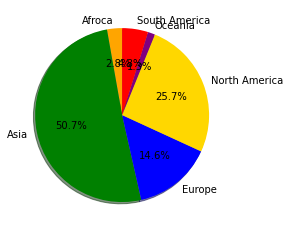

In [51]:
continent_power = [africa_total_power, asia_total_power, europe_total_power, na_total_power, oceania_total_power, sa_total_power]
# Labels for the sections of our pie chart
labels = ["Afroca", "Asia", "Europe", "North America" , "Oceania", "South America"]

# The colors of each section of the pie chart
colors = ["orange", "green", "blue", "gold" , "purple" , "red"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0, 0, .5)
plt.pie(continent_power,  labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

In [56]:
asia_power_contributers = asia_merge.groupby(['Country'], as_index = False).sum()
asia_country_power_value = asia_power_contributers['Capacity']
countries_only_asia_conributers = asia_power_contributers['Country']

# Labels for the sections of our pie chart
asia_members = [asia_names]



In [65]:
na_power_contributers = na_merge.groupby(['Country'], as_index = False).sum()
na_country_power_value = na_power_contributers['Capacity']
countries_only_na_conributers = na_power_contributers['Country']

In [59]:
sa_power_contributers = sa_merge.groupby(['Country'], as_index = False).sum()
sa_country_power_value = sa_power_contributers['Capacity']
countries_only_sa_conributers = sa_power_contributers['Country']

In [60]:
europe_power_contributers = europe_merge.groupby(['Country'], as_index = False).sum()
europe_country_power_value = europe_power_contributers['Capacity']
countries_only_europe_conributers = europe_power_contributers['Country']

In [64]:
oceania_power_contributers = oceania_merge.groupby(['Country'], as_index = False).sum()
oceania_country_power_value = oceania_power_contributers['Capacity']
countries_only_oceania_conributers = oceania_power_contributers['Country']

In [63]:
africa_power_contributers = africa_merge.groupby(['Country'], as_index = False).sum()
africa_country_power_value = africa_power_contributers['Capacity']
countries_only_africa_conributers = africa_power_contributers['Country']